In [22]:
import os

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline


In [23]:
data = pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

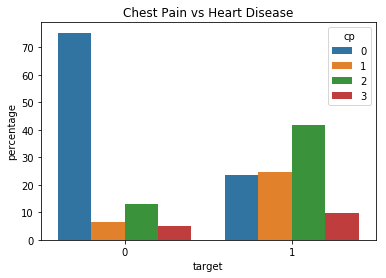

In [25]:
temp = (data.groupby(['target']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "target", y = "percentage", hue = "cp", data = temp)\
.set_title("Chest Pain vs Heart Disease")

In [31]:
#plt.figure(figsize=(14,10))
#sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
# plt.show()

In [32]:
data.groupby('cp',as_index=False)['target'].mean()

,cp,target
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [33]:
def CrossVal(dataX,dataY,mode,cv=10):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))